<a href="https://colab.research.google.com/github/hujin1005/FIFA/blob/main/Copy_of_FIFA22(linktohome).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount at Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import Modules

In [ ]:
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set()


import warnings
warnings.filterwarnings("ignore")

Bringing in the Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/thinkful bootcamp/Python_for_data_analysts/FIFA22_official_data.csv')
pd.set_option('display.max_columns', None)
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

Cleaning Data

"Wage" and "Value" are both object in the dataset, convert them into int and float by remove the "€". For players whose wage ends with "K" (meaning thousand), K needs to be removed and the number needs to be muliply by 1000. Same principle applies to the "Value", if ends with "M" (meaning million), M needs to be removed and the muber needs to be multiply by 1000000

In [ ]:
def int_wage(w):

    w = str(w).replace("€", "") #remove the uero sign
    if "K" in w:
      w = int(str(w).replace("K", ""))*1000 #remove "K" but need to multiply by 1000
    else:
      w = w
    return w

df["Wage"] = df["Wage"].apply(int_wage)
df["Wage"] = df["Wage"].astype(int) #change datatype to int
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  int64  
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

cleaning the "Value" column and convert to int

In [ ]:
def int_value(v):
  v = str(v).replace("€", "") # remove the "€"
  for y in v:
    if "M" in v:
      v = float(str(v).replace("M", ""))*1000000 #remove "M" but need to multiply by 1000000
    elif "K" in v:
      v = float(str(v).replace("K", ""))*1000 #remove "K" but need to multiply by 1000
    else:
      v = v
    return v
df["Value"]= df["Value"].apply(int_value)
df["Value"]= df["Value"].astype(int) #change "Value" to int
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  int64  
 11  Wage                      16710 non-null  int64  
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

cleaning the "Position" Column

In [ ]:
unique_position = df["Position"].unique() # observing how the vaules in "Position" formated
print(unique_position)

['<span class="pos pos18">CAM' '<span class="pos pos11">LDM'
 '<span class="pos pos24">RS' '<span class="pos pos13">RCM'
 '<span class="pos pos7">LB' '<span class="pos pos9">RDM'
 '<span class="pos pos15">LCM' '<span class="pos pos28">SUB'
 '<span class="pos pos26">LS' '<span class="pos pos12">RM'
 '<span class="pos pos6">LCB' '<span class="pos pos16">LM'
 '<span class="pos pos3">RB' '<span class="pos pos10">CDM'
 '<span class="pos pos23">RW' '<span class="pos pos27">LW'
 '<span class="pos pos25">ST' '<span class="pos pos14">CM'
 '<span class="pos pos20">RF' '<span class="pos pos8">LWB'
 '<span class="pos pos17">RAM' '<span class="pos pos21">CF'
 '<span class="pos pos29">RES' '<span class="pos pos22">LF'
 '<span class="pos pos2">RWB' '<span class="pos pos5">CB'
 '<span class="pos pos4">RCB' nan '<span class="pos pos19">LAM'
 '<span class="pos pos0">GK']


Removing the unneccessary part from values in the "Position" as much as possible

In [ ]:
def clean_position(p):
  p = str(p).replace("<span class=\"pos pos", "") #remove everything before the number
  p = str(p).replace("\">", "") #remove everything between the numbers and the position abbreviation
  return p
df["Position"]= df["Position"].apply(clean_position)
cleaned_position = clean_position(df["Position"])
print(df["Position"].unique())
print(df["Position"].info())

['18CAM' '11LDM' '24RS' '13RCM' '7LB' '9RDM' '15LCM' '28SUB' '26LS' '12RM'
 '6LCB' '16LM' '3RB' '10CDM' '23RW' '27LW' '25ST' '14CM' '20RF' '8LWB'
 '17RAM' '21CF' '29RES' '22LF' '2RWB' '5CB' '4RCB' 'nan' '19LAM' '0GK']
<class 'pandas.core.series.Series'>
RangeIndex: 16710 entries, 0 to 16709
Series name: Position
Non-Null Count  Dtype 
--------------  ----- 
16710 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB
None


selecting rows for t tests and pearson r tests. first, only keep players who play attacking positions which are expected to score. Here is the list of attacking position: CAM: Central Attacking Midfielder
RS: Right Striker
RCM: Right Central Midfielder
LCM: Left Central Midfielder
LS: Left Striker
RM: Right Midfielder
LM: Left Midfielder
RW: Right Winger
LW: Left Winger
ST: Striker
CM: Central Midfielder
RF: Right Forward
RAM: Right Attacking Midfielder
CF: Center Forward
LF: Left Forward
LAM: Left Attacking Midfielder

In [ ]:
attack_postion = ['18CAM', '24RS', '13RCM', '15LCM', '26LS', '12RM', '16LM', '23RW', '27LW', '25ST', '14CM', '20RF', '17RAM', '21CF', '22LF', '19LAM']
score_df = df[df["Position"].isin(attack_postion)]
score_df.info() #observing the selected dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242 entries, 0 to 15351
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3242 non-null   int64  
 1   Name                      3242 non-null   object 
 2   Age                       3242 non-null   int64  
 3   Photo                     3242 non-null   object 
 4   Nationality               3242 non-null   object 
 5   Flag                      3242 non-null   object 
 6   Overall                   3242 non-null   int64  
 7   Potential                 3242 non-null   int64  
 8   Club                      3199 non-null   object 
 9   Club Logo                 3242 non-null   object 
 10  Value                     3242 non-null   int64  
 11  Wage                      3242 non-null   int64  
 12  Special                   3242 non-null   int64  
 13  Preferred Foot            3242 non-null   object 
 14  Interna

In [ ]:
score_df[["Wage", "Dribbling", "Finishing"]].describe()


,Wage,Dribbling,Finishing
count,3242.000000,3242.000000,3242.000000
mean,15219.201110,69.916718,64.657310
std,28649.483326,7.515848,10.333505
min,0.000000,40.000000,21.000000
25%,2000.000000,65.000000,59.000000
50%,6000.000000,70.000000,65.000000
75%,16000.000000,75.000000,71.000000
max,350000.000000,96.000000,95.000000


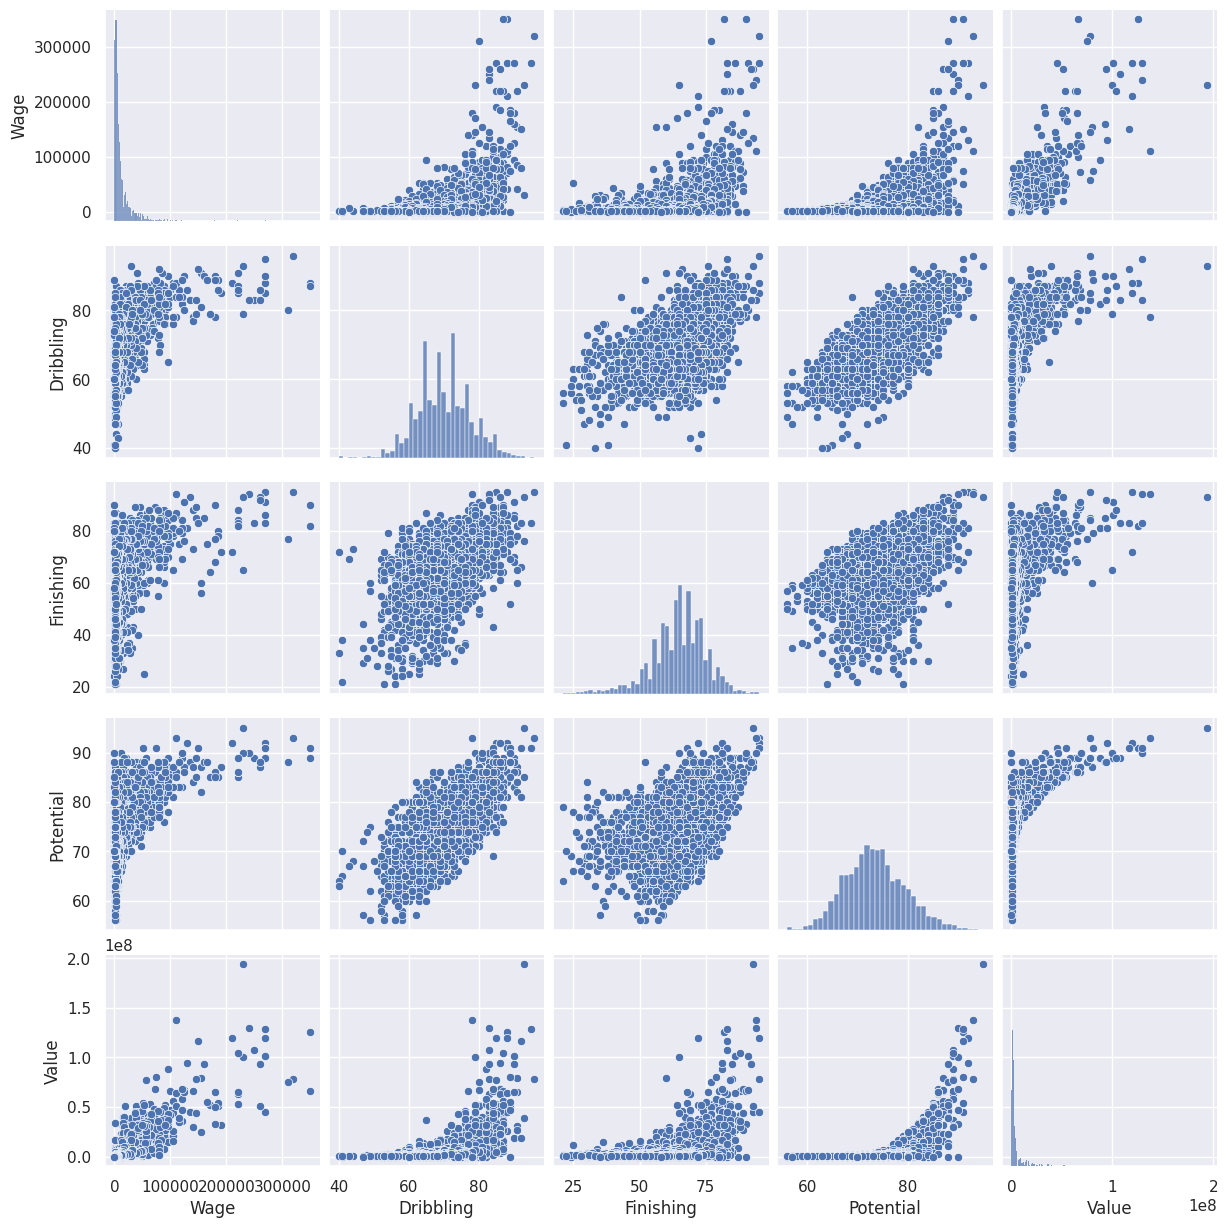

In [ ]:
sns.pairplot(score_df[["Wage", "Dribbling", "Finishing", "Potential", "Value"]])

In [ ]:
unique_nationality = score_df["Nationality"].unique()
print(unique_nationality)


['Portugal' 'Uruguay' 'Belgium' 'Brazil' 'France' 'Croatia' 'Spain'
 'Italy' 'Netherlands' 'Colombia' 'Serbia' 'Argentina' 'Poland' 'Egypt'
 'England' 'Germany' 'Ukraine' 'Senegal' 'Denmark' 'Mexico'
 'Bosnia and Herzegovina' 'Armenia' 'Korea Republic' 'Russia' 'Slovakia'
 'North Macedonia' 'Ghana' 'Romania' 'Jamaica' 'Austria' 'Guinea'
 'Scotland' 'Mali' 'China PR' 'Norway' 'Turkey' 'Nigeria' 'United States'
 'Gabon' 'Switzerland' 'Paraguay' 'Cameroon' 'Algeria' 'Morocco' 'Finland'
 'Israel' 'Slovenia' "Côte d'Ivoire" 'Congo DR' 'Japan' 'Greece' 'Peru'
 'Czech Republic' 'Chile' 'Venezuela' 'Iceland' 'Sweden' 'Bulgaria'
 'Uzbekistan' 'Curacao' 'Republic of Ireland' 'Guinea Bissau'
 'Northern Ireland' 'Kosovo' 'Fiji' 'Cape Verde Islands' 'Ecuador'
 'Hungary' 'Australia' 'Comoros' 'Canada' 'Kenya' 'Saudi Arabia' 'Georgia'
 'Zimbabwe' 'Madagascar' 'Wales' 'Malta' 'Angola' 'Chinese Taipei'
 'Tunisia' 'Syria' 'Iran' 'South Africa' 'New Zealand' 'Grenada' 'Togo'
 'Luxembourg' 'Iraq' 'Trinida

In [ ]:
def c_name(a):
  for c in a:
    if c in unique_nationality:
      print(c)
    else:
      print("f")

top_10_sa = ["Brazil", "Argentina","Uruguay", "Colombia", "Chile", "Peru", "Paraguay", "Ecuador","Venezuela", "Bolivia"]
top_c_name = c_name(top_10_sa)
print(top_c_name)

Brazil
Argentina
Uruguay
Colombia
Chile
Peru
Paraguay
Ecuador
Venezuela
Bolivia
None


In [ ]:
def c_name(a):
  for c in a:
    if c in unique_nationality:
      print(c)
    else:
      print("f")

top_10_eu = ["Belgium", "France", "England", "Spain", "Germany", "Portugal", "Italy", "Netherlands", "Croatia", "Switzerland"]
top_c_name = c_name(top_10_eu)
print(top_c_name)

Belgium
France
England
Spain
Germany
Portugal
Italy
Netherlands
Croatia
Switzerland
None


getting ready for the t test comparing "Dribbling" between South American players and European players

In [ ]:
desired_sa = score_df[score_df["Nationality"].isin(top_10_sa)]
desired_eu = score_df[score_df["Nationality"].isin(top_10_eu)]
dribble_sa_n = desired_sa.shape[0]
dribble_eu_n = desired_eu.shape[0]
print(dribble_sa_n) #size of south american dribbling
print(dribble_eu_n) # size of European dribbling

664
1214


In [ ]:
print(desired_sa.info()) # check for null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 2 to 15282
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        664 non-null    int64  
 1   Name                      664 non-null    object 
 2   Age                       664 non-null    int64  
 3   Photo                     664 non-null    object 
 4   Nationality               664 non-null    object 
 5   Flag                      664 non-null    object 
 6   Overall                   664 non-null    int64  
 7   Potential                 664 non-null    int64  
 8   Club                      649 non-null    object 
 9   Club Logo                 664 non-null    object 
 10  Value                     664 non-null    int64  
 11  Wage                      664 non-null    int64  
 12  Special                   664 non-null    int64  
 13  Preferred Foot            664 non-null    object 
 14  Internat

In [ ]:
stats.ttest_ind(desired_sa["Dribbling"], desired_eu["Dribbling"]) # t test comparing "Dribbling" between South American players and European players

Ttest_indResult(statistic=5.009037937440864, pvalue=5.983609827183261e-07)

In [ ]:
import math
dribble_sa_mean = desired_sa["Dribbling"].mean()
dribble_eu_mean = desired_eu["Dribbling"].mean()
dribble_sa_var = desired_sa["Dribbling"].var()
dribble_eu_var = desired_eu["Dribbling"].var()
print(dribble_sa_mean) # mean of sa dribble
print(dribble_eu_mean) # mean of eu dribble
print(dribble_sa_var) # variance of sa dribble
print(dribble_eu_var) # variance of eu driible

72.0316265060241
70.15650741350906
52.95676597793891
64.08265753621869


getting the confidence interval difference upper and lower limit

In [ ]:
mean_difference = dribble_eu_mean - dribble_sa_mean
std_err_difference = math.sqrt((dribble_sa_var/dribble_sa_n) + (dribble_eu_var/dribble_eu_n))
margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error
print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -2.5886789957179044 and -1.1615591893121664.


In [ ]:
def get_95_ci(array_1, array_2):
    dribble_sa_n = array_1.shape[0]
    dribble_eu_n = array_2.shape[0]
    dribble_sa_mean = array_1.mean()
    dribble_eu_mean = array_2.mean()
    dribble_sa_var = array_1.var()
    dribble_eu_var = array_2.var()
    mean_difference = dribble_eu_mean - dribble_sa_mean
    std_err_difference = math.sqrt((dribble_sa_var/dribble_sa_n)+(dribble_eu_var/dribble_eu_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(desired_sa["Dribbling"],desired_eu["Dribbling"])

'The difference in means at the 95% confidence interval (two-tail) is between -2.5886789957179044 and -1.1615591893121664.'

In [ ]:
union_data = pd.concat([desired_sa[["Dribbling"]], desired_eu[["Dribbling"]]])
union_data["Group"] = ["SA"]*len(desired_sa) + ["EU"]*len(desired_eu)
print(union_data.tail())

       Dribbling Group
14011       57.0    EU
14150       59.0    EU
14337       53.0    EU
14509       56.0    EU
14553       55.0    EU


<Axes: xlabel='Group', ylabel='Dribbling'>

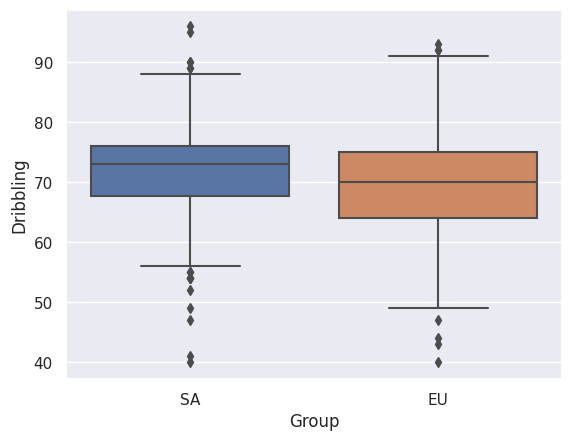

In [ ]:
sns.boxplot(x="Group", y= "Dribbling", data = union_data)

In [ ]:
stats.ttest_ind(desired_sa["Wage"], desired_eu["Wage"])

Ttest_indResult(statistic=-2.6128665631370818, pvalue=0.0090503502081908)

In [ ]:
import math
wage_1_mean = desired_sa["Wage"].mean()
wage_2_mean = desired_eu["Wage"].mean()
wage_1_var = desired_sa["Wage"].var()
wage_2_var = desired_eu["Wage"].var()
print(wage_1_mean)
print(wage_2_mean)
print(wage_1_var)
print(wage_2_var)

15336.219879518072
19449.299835255355
736181435.0104036
1242608093.0790272


In [ ]:
mean_difference = wage_2_mean - wage_1_mean
std_err_difference = math.sqrt((wage_1_var/wage_1_n) + (wage_2_var/wage_2_n))
margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error
print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

NameError: ignored

In [ ]:
def get_95_ci(array_1, array_2):
    wage_1_n = array_1.shape[0]
    wage_2_n = array_2.shape[0]
    wage_1_mean = array_1.mean()
    wage_2_mean = array_2.mean()
    wage_1_var = array_1.var()
    wage_2_var = array_2.var()
    wage_difference = wage_2_mean - wage_1_mean
    std_err_difference_wage = math.sqrt((wage_1_var/wage_1_n)+(wage_2_var/wage_2_n))
    margin_of_error = 1.96 * std_err_difference_wage
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(desired_sa["Wage"],desired_eu["Wage"])

'The difference in means at the 95% confidence interval (two-tail) is between -2863.9262401220103 and 2860.1760019369804.'

In [ ]:
stats.ttest_ind(desired_sa["Finishing"], desired_eu["Finishing"])

Ttest_indResult(statistic=3.7735505026136993, pvalue=0.00016593859191608876)

In [ ]:
score_1_mean = desired_sa["Finishing"].mean()
score_2_mean = desired_eu["Finishing"].mean()
score_1_var = desired_sa["Finishing"].var()
score_2_var = desired_eu["Finishing"].var()
print(score_1_mean)
print(score_2_mean)
print(score_1_var)
print(score_2_var)

66.7078313253012
64.7677100494234
112.20711806502025
114.14715105848096


In [ ]:
def get_95_ci(array_1, array_2):
    score_1_n = array_1.shape[0]
    score_2_n = array_2.shape[0]
    score_1_mean = array_1.mean()
    score_2_mean = array_2.mean()
    score_1_var = array_1.var()
    score_2_var = array_2.var()
    score_difference = score_2_mean - score_1_mean
    std_err_difference = math.sqrt((score_1_var/score_1_n)+(score_2_var/score_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(desired_sa["Finishing"],desired_eu["Finishing"])

'The difference in means at the 95% confidence interval (two-tail) is between -2.8802996673732215 and -0.869938517656849.'

In [ ]:
stats.pearsonr(score_df["Dribbling"], score_df["Finishing"])

PearsonRResult(statistic=0.5205284122231821, pvalue=1.2498132347020752e-224)

<Axes: xlabel='Dribbling', ylabel='Finishing'>

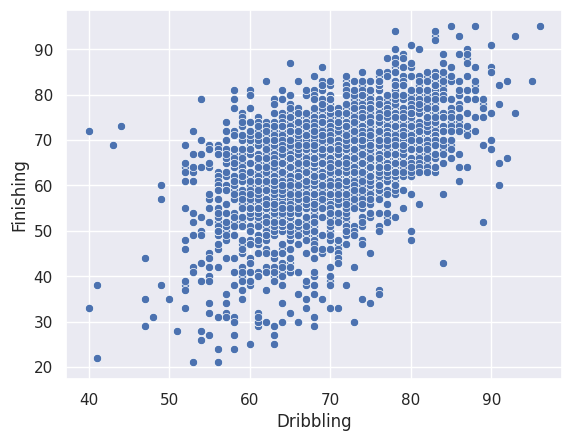

In [ ]:
sns.scatterplot(x = "Dribbling", y = "Finishing", data= score_df)


In [ ]:
stats.pearsonr(score_df["Finishing"], score_df["Value"])

PearsonRResult(statistic=0.39728494075722115, pvalue=4.8977256898457245e-123)

<Axes: xlabel='Finishing', ylabel='Wage'>

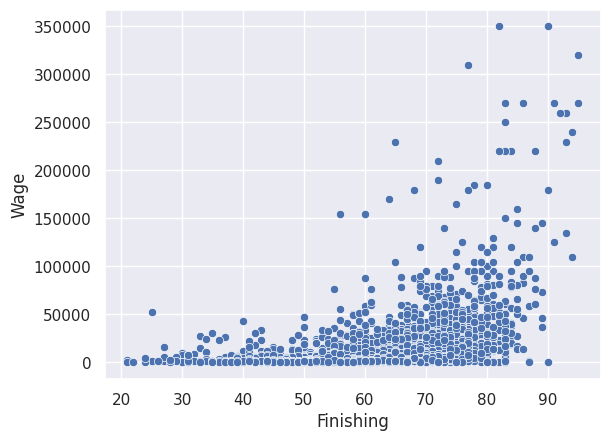

In [ ]:
sns.scatterplot(x= "Finishing", y= "Wage", data=score_df)